In [1]:
!pip install gensim

In [2]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Volumes/New Volume/UIU/UIU/5th Semester/ML Project/Project 2.0/Datasets/complaints.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-11-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33055.0,NaN,Other,Web,2019-11-24,Closed with explanation,Yes,NaN,3448817
1,2019-03-29,Vehicle loan or lease,Loan,Managing the loan or lease,Billing problem,NaN,NaN,"Westlake Services, LLC",FL,33407.0,NaN,NaN,Postal mail,2019-03-29,Closed with explanation,Yes,NaN,3195205
2,2019-07-12,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,Company disputes the facts presented in the co...,"NRA Group, LLC",IL,60628.0,NaN,Consent not provided,Web,2019-07-12,Closed with explanation,Yes,NaN,3304855
3,2019-01-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",OH,44125.0,NaN,Consent not provided,Web,2019-01-16,Closed with non-monetary relief,Yes,NaN,3125928
4,2019-04-15,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,My credit reports list monies owed to XXXX. I ...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,VA,23188.0,NaN,Consent provided,Web,2019-04-15,Closed with non-monetary relief,Yes,NaN,3212244


In [5]:
columns_drop =['Date received','Sub-product','Issue','Sub-issue','Company public response','Company','State','ZIP code','Tags','Consumer consent provided?','Submitted via','Date sent to company','Company response to consumer','Timely response?','Consumer disputed?','Complaint ID']

In [6]:
df = df.drop(columns = columns_drop,axis = 1)

In [7]:
df.head()

,Product,Consumer complaint narrative
0,"Credit reporting, credit repair services, or o...",NaN
1,Vehicle loan or lease,NaN
2,Debt collection,NaN
3,"Credit reporting, credit repair services, or o...",NaN
4,"Credit reporting, credit repair services, or o...",My credit reports list monies owed to XXXX. I ...


In [8]:
df = df.rename(columns = {'Product':'tags','Consumer complaint narrative':'post'})

In [9]:
df = df.dropna()

In [10]:
len(df)

844218

In [11]:
df = df.replace(['Credit reporting, credit repair services, or other personal consumer reports'],'Credit reporting')
df = df.replace(['Credit card or prepaid card'],'Credit card')
df = df.replace(['Checking or savings account'],'Checking account')
df = df.replace(['Money transfer, virtual currency, or money service'],'Money service')
df = df.replace(['Vehicle loan or lease'],'Vehicle loan')
df = df.replace(['Bank account or service'],'Bank account')
df = df.replace(['Payday load,title loan, or personal loan'],'Personal loan')

In [12]:
df['tags'].value_counts()

Credit reporting                             366170
Debt collection                              163492
Mortgage                                      86711
Credit card                                   82738
Checking account                              39584
Student loan                                  29557
Money service                                 19844
Vehicle loan                                  15882
Bank account                                  14885
Payday loan, title loan, or personal loan     10884
Consumer Loan                                  9470
Payday loan                                    1746
Money transfers                                1497
Prepaid card                                   1450
Other financial service                         292
Virtual currency                                 16
Name: tags, dtype: int64

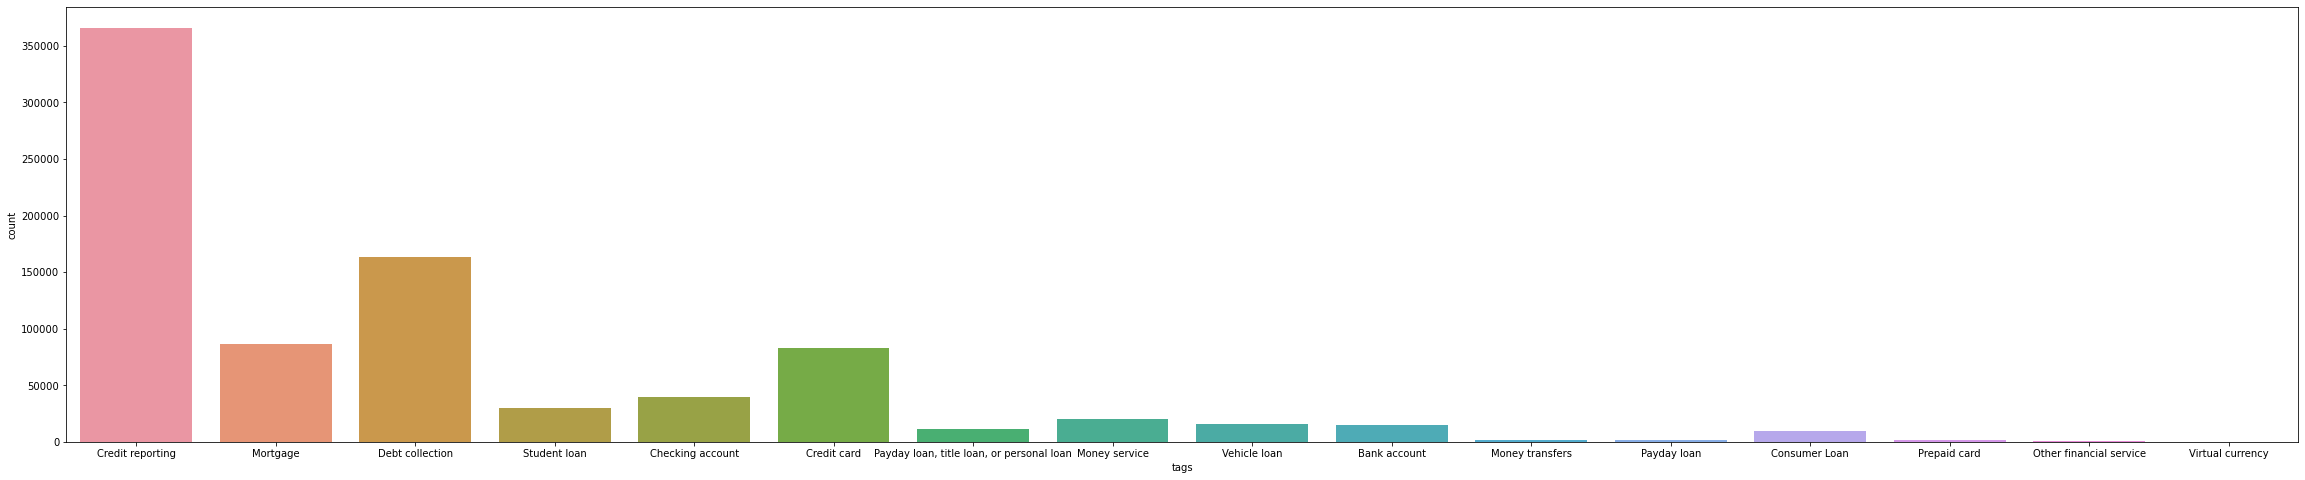

In [17]:
plt.figure(figsize=(40,8))
sns.countplot(data =df, x = df['tags'])
plt.savefig('tag_distribution.png')
plt.show()


In [18]:
df.to_csv('to_balance_csv')


KeyError: "['Consumer Loan' 'Payday loan' 'Money transfers' 'Prepaid card'\n 'Other financial service' 'Virtual currency'] not found in axis"

In [ ]:
df_split = df.sample(frac=0.3,random_state=200)
df_split.reset_index()


,index,tags,post
0,2234045,Credit reporting,XXXX XXXX provided validation of debt with ina...
1,510932,Debt collection,"On XX/XX/2021, I received a letter from XXXX X..."
2,2319747,Mortgage,I applied online for a refinance mortgage. I s...
3,549400,Checking account,{$1500.00} illegally was removed by XXXX XXXX ...
4,669603,Checking account,Someone without my knowledge or consent made a...
...,...,...,...
253260,1995537,Credit reporting,This was an economic hardship issue that start...
253261,1305486,Credit reporting,There are XXXX accounts on my credit report ...
253262,458394,Debt collection,XX/XX/2019 Called & Cancelled all cable & inte...
253263,2212851,Credit reporting,XX/XX/2017 I had pulled my credit I sent dispu...


In [ ]:
df_split['tags'].value_counts()

Credit reporting                             109823
Debt collection                               49275
Mortgage                                      26019
Credit card                                   24715
Checking account                              11921
Student loan                                   8784
Money service                                  6010
Vehicle loan                                   4684
Bank account                                   4547
Payday loan, title loan, or personal loan      3235
Consumer Loan                                  2772
Payday loan                                     506
Prepaid card                                    461
Money transfers                                 426
Other financial service                          82
Virtual currency                                  5
Name: tags, dtype: int64

In [ ]:
df_split.to_csv('main_split.csv')

In [ ]:
df_split_1 = df.sample(frac=0.001,random_state=200)
df_split_1.reset_index()

,index,tags,post
0,2234045,Credit reporting,XXXX XXXX provided validation of debt with ina...
1,510932,Debt collection,"On XX/XX/2021, I received a letter from XXXX X..."
2,2319747,Mortgage,I applied online for a refinance mortgage. I s...
3,549400,Checking account,{$1500.00} illegally was removed by XXXX XXXX ...
4,669603,Checking account,Someone without my knowledge or consent made a...
...,...,...,...
839,2022036,Student loan,Navient has only offered me forbearance and ne...
840,1205380,Debt collection,I first received notice in mail on XX/XX/2021 ...
841,1454707,Debt collection,My name is XXXX XXXX My Account number XXXX I ...
842,620229,Credit reporting,Unauthorized reporting multiple laws were viol...


In [ ]:
df_split_1.to_csv('validation_split.csv')

In [ ]:
df_split_2 = df.sample(frac=0.002,random_state=200)


In [ ]:
df_split_2.head()

,tags,post
2234045,Credit reporting,XXXX XXXX provided validation of debt with ina...
510932,Debt collection,"On XX/XX/2021, I received a letter from XXXX X..."
2319747,Mortgage,I applied online for a refinance mortgage. I s...
549400,Checking account,{$1500.00} illegally was removed by XXXX XXXX ...
669603,Checking account,Someone without my knowledge or consent made a...


In [ ]:
df_split_1.to_csv('dataset.csv')

In [ ]:
df_split_3 = df.sample(frac=0.003,random_state=100)
df_split_3.to_csv('dataset_test.csv')